# Stakeholder Questions

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [2]:
#importing cvs files and saving them under a variable
kc_house_df = pd.read_csv("../data/kc_df_cleaned.csv")
kc_house_df.head()
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17925 entries, 0 to 17924
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17925 non-null  float64
 1   bedrooms     17925 non-null  int64  
 2   sqft_living  17925 non-null  int64  
 3   sqft_lot     17925 non-null  int64  
 4   floors       17925 non-null  float64
 5   condition    17925 non-null  int64  
 6   grade        17925 non-null  int64  
 7   zipcode      17925 non-null  int64  
 8   lat          17925 non-null  float64
 9   long         17925 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.4 MB


***
## Question 1: What are the Top 20 Zipcodes in Terms of Average Price of Home?

In [3]:
grouped_df = kc_house_df.groupby(['zipcode']).mean().reset_index()
zip_df = grouped_df.sort_values(['price'], axis = 0, ascending = False)
zip_df.head(20)

,zipcode,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,lat,long
24,98039,1.262353e+06,3.647059,2437.058824,13561.705882,1.294118,3.647059,8.000000,47.625665,-122.233353
3,98004,1.026963e+06,3.630000,2333.450000,11971.130000,1.340000,3.575000,8.105000,47.614287,-122.203665
25,98040,1.000008e+06,3.970588,2746.549020,12806.539216,1.428922,3.852941,8.671569,47.559917,-122.225990
48,98112,9.001475e+05,3.331683,2147.757426,4225.366337,1.759901,3.485149,8.168317,47.629323,-122.298559
47,98109,8.060426e+05,3.142857,1945.274725,3501.923077,1.681319,3.461538,7.868132,47.635397,-122.349626
53,98119,7.817237e+05,3.178344,1939.000000,3421.808917,1.773885,3.318471,7.949045,47.640588,-122.366955
43,98105,7.716703e+05,3.328125,1974.177083,4615.411458,1.552083,3.640625,7.697917,47.665243,-122.295875
41,98102,7.710274e+05,3.085366,1915.109756,3125.365854,1.963415,3.304878,8.121951,47.633724,-122.322427
4,98005,7.685944e+05,3.798658,2537.785235,18348.362416,1.238255,3.731544,8.348993,47.609999,-122.167940
5,98006,7.519039e+05,3.744681,2614.750000,12489.055851,1.425532,3.715426,8.518617,47.558574,-122.149027


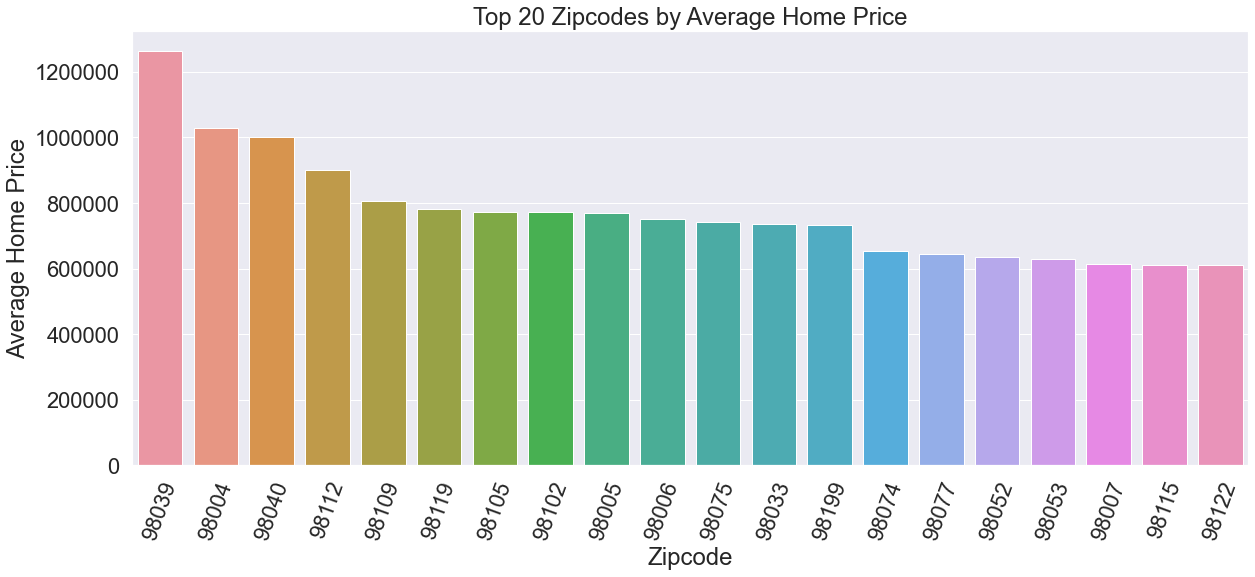

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set_style('darkgrid')
palette = sns.set_palette("husl", 8)

ax = sns.barplot(x=zip_df.head(20)['zipcode'], y=zip_df.head(20)['price'], order = zip_df.head(20)['zipcode'])
ax.set(xlabel='Zipcode', ylabel='Average Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.xticks(rotation=70)
plt.title('Top 20 Zipcodes by Average Home Price')
sns.set(font_scale=2.0)
plt.show()

***
## Question 2: What Grade of Homes Sell at the Highest Price?

In [5]:
kc_house_df['grade'].unique()

array([ 7,  6,  8,  9, 11, 10,  5])

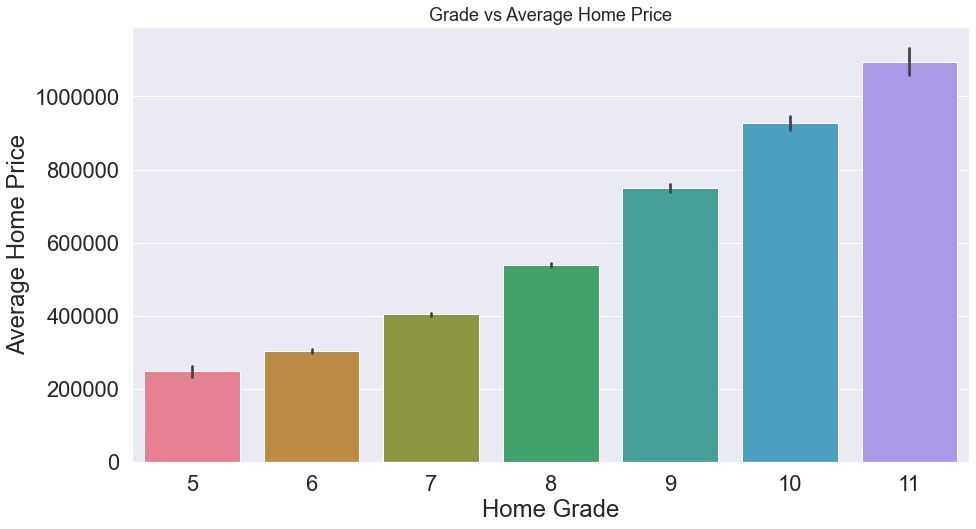

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("husl", 8)
ax = sns.barplot(data=kc_house_df, x = "grade", y = "price")
ax.set(xlabel='Home Grade', 
       ylabel='Average Home Price')
plt.title('Grade vs Average Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

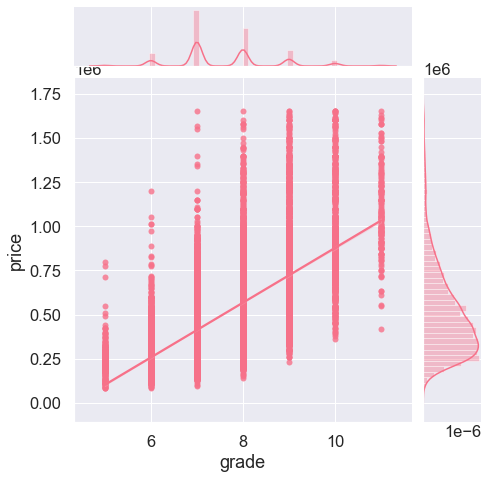

In [7]:
sns.jointplot('grade', 'price', data=kc_house_df, kind='reg', height = 7)
sns.set(font_scale=1.5)

In [8]:
grd_vs_avg_price = kc_house_df.groupby('grade')['price'].mean()

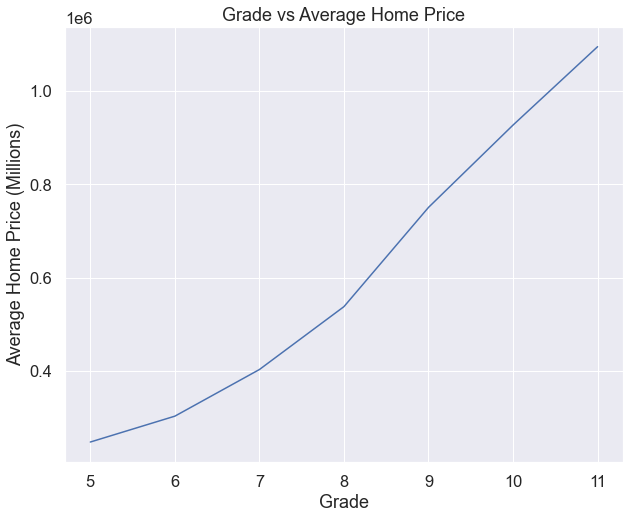

In [9]:
ax = grd_vs_avg_price.plot(figsize=(10,8))
ax.set(xlabel='Grade', ylabel='Average Home Price (Millions)')
plt.title('Grade vs Average Home Price')
plt.show()

***
## Question 3: What Condition of Homes Sell at the Highest Price?

In [10]:
kc_house_df['condition'].unique()

array([3, 5, 4, 2])

In [11]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
0,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
1,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
2,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
3,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
4,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


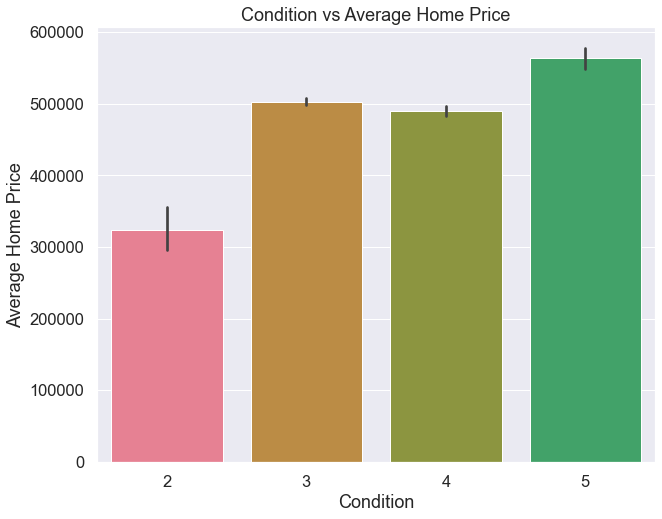

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("husl", 8)
ax = sns.barplot(data=kc_house_df, x = "condition", y = "price")
ax.set(xlabel='Condition', ylabel='Average Home Price')
plt.title('Condition vs Average Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

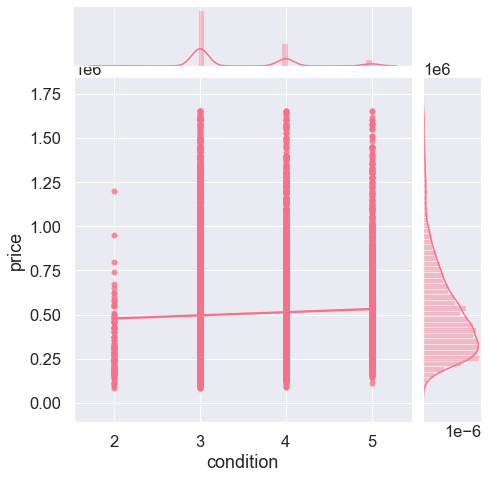

In [13]:
sns.jointplot('condition', 'price', data=kc_house_df, kind='reg', height = 7)
sns.set(font_scale=1.5)